## Set Environment

In [1]:
library(tidyverse)
library(MASS)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



## Generate Dataset from Gaussian Mixed Model (GMM)

In [2]:
fun_gau = function(n, mu, sig2, label_cluster){
    ### dataset from the first model
    x = mvrnorm(n, mu, sig2)  %>% as.data.frame
    colnames(x) = c("X1", "X2")
    x$Z = label_cluster
    return(x)
}

fun_gmm = function(ns, mus, sig2, label_sample){
    ids = 1:length(ns)
    dat = lapply(ids, function(idx){fun_gau(ns[idx], mus[idx,], sig2, idx)})
    dat = do.call(bind_rows, dat)
    dat$C = label_sample
    return(dat)
}

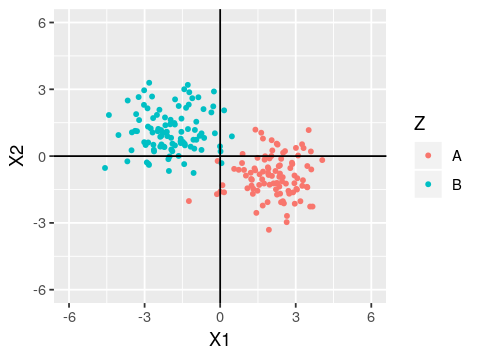

In [4]:
options(repr.plot.width=4, repr.plot.height=3)

set.seed(123)
sig2 = matrix(c(1,0,0,1),2,2)
mat1  = fun_gau(100, c( 2, -1), sig2, "A")
mat2  = fun_gau(100, c(-2,  1), sig2, "B")
mat   = bind_rows(mat1, mat2)

gp = mat %>% 
    as.data.frame %>%
    ggplot(aes(x=X1, y=X2, color=Z)) +
    geom_point(size=1) +
    geom_vline(xintercept=0) +
    geom_hline(yintercept=0) +
    xlim(c(-6, 6)) +
    ylim(c(-6, 6))
print(gp)

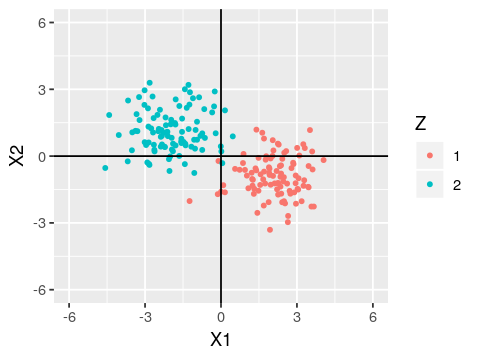

In [7]:
options(repr.plot.width=4, repr.plot.height=3)

set.seed(123)
sig2 = matrix(c(1,0,0,1),2,2)

ns  = c(100, 100)
mus = rbind(c( 2, -1), c(-2,  1))
mat = fun_gmm(ns, mus, sig2, 1) %>% 
    mutate(Z=as.character(Z)) %>%
    mutate(C=as.character(C))

gp = mat %>% 
    as.data.frame %>%
    ggplot(aes(x=X1, y=X2, color=Z)) +
    geom_point(size=1) +
    geom_vline(xintercept=0) +
    geom_hline(yintercept=0) +
    xlim(c(-6, 6)) +
    ylim(c(-6, 6))
print(gp)

In [9]:
### make a small shift from the first model
delta = matrix(c(
    0.5, 0.5,
   -0.5, 0.5,
    0.5,-0.5), 3, 2, byrow=TRUE)

### mean/center of total
mu = matrix(c(
    0, 0,
    3, 3,
    0, 3), 3, 2, byrow=TRUE)

### mean/center of the first  model
### mean/center of the second model
mu1 = mu
mu2 = mu + delta

### cov matrix
sig2 = matrix(c(1,0,0,1),2,2)

### number of cells
ns = c(100, 850, 50)

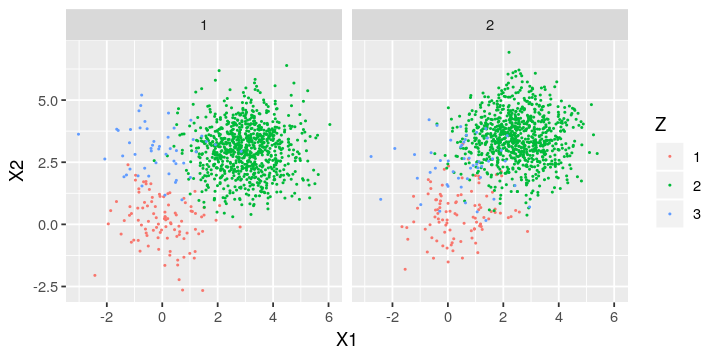

In [10]:
options(repr.plot.width=6, repr.plot.height=3)

mat1 = fun_gmm(ns, mu1, sig2, 1)
mat2 = fun_gmm(ns, mu2, sig2, 2)
mat  = bind_rows(mat1, mat2)

gp = mat %>% 
    as.data.frame %>% 
    mutate(Z = as.character(Z)) %>%
    ggplot(aes(x = X1, y = X2, color = Z)) + 
        geom_point(size = 0.2) +
        facet_wrap(~ C)
print(gp)

In [11]:
head(mat)

X1,X2,Z,C
0.60189285,-0.07355602,1,1
0.99369859,-1.16865142,1,1
-1.02678506,-0.63474826,1,1
-0.75106130,-0.02884155,1,1
1.50916654,0.67069597,1,1
0.09514745,-1.65054654,1,1


In [12]:
Y = mat[,c("X1", "X2")]
C = mat[,c("C"), drop=FALSE]

print(head(Y))
print(head(C))

           X1          X2
1  0.60189285 -0.07355602
2  0.99369859 -1.16865142
3 -1.02678506 -0.63474826
4 -0.75106130 -0.02884155
5  1.50916654  0.67069597
6  0.09514745 -1.65054654
  C
1 1
2 1
3 1
4 1
5 1
6 1


In [13]:
write_delim(
    Y,
    path  = "Y.txt",
    delim = "\t",
    col_names = TRUE)

In [14]:
write_delim(
    C,
    path  = "C.txt",
    delim = "\t",
    col_names = FALSE)